# Testing pybeepop

### Import required packages

In [1]:
from pybeepop import PyBeePop
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Create a PyBeePop object

In [2]:
beepop = PyBeePop(verbose=True)

Model initialized.


### Set parameters, load example weather, parameter, and pesticide residue files

In [3]:
# Define inputs and file paths
START_DATE = '06/16/2014'
END_DATE = '10/10/2014'
run_parameters = {"ICWorkerAdults": 23000, "ICWorkerBrood": 8000, "SimStart": START_DATE, "SimEnd": END_DATE,
        'IPollenTrips': 8, 'INectarTrips': 17}
weather = os.path.abspath('test_data/cedar_grove_NC_weather.txt')
parameter_file = os.path.abspath('test_data/example_parameters.txt')
residue_file = os.path.abspath('test_data/example_residue_file.txt')

# Load inputs into BeePop+
beepop.load_weather(weather)
beepop.load_residue_file(residue_file)
beepop.load_parameter_file(parameter_file)
beepop.set_parameters(run_parameters)


Loaded Weather
Loaded residue file
Updated parameters
Updated parameters


### Run the model and print the results DataFrame

In [4]:
results = beepop.run_model()
print(results)

          Date  Colony Size  Adult Drones  Adult Workers  Foragers  \
0      Initial        23000             0          15561      7439   
1    6/16/2014        22874             0          15435      7439   
2    6/17/2014        22748             0          15309      7439   
3    6/18/2014        22622             0          15183      7439   
4    6/19/2014        22496             0          15057      7439   
..         ...          ...           ...            ...       ...   
112  10/5/2014        46956           576          25696     20684   
113  10/6/2014        46605           558          25470     20577   
114  10/7/2014        46223           540          25232     20451   
115  10/8/2014        45792           522          24980     20290   
116  10/9/2014        43932           512          24672     18748   

     Active Foragers  Capped Drone Brood  Capped Worker Brood  Drone Larvae  \
0               6900                   0                 8000             0   
1

### Fetch a list of parameters that were set

In [5]:
beepop.get_parameters()

{'icdroneadults': '0',
 'icworkeradults': 23000,
 'icdronebrood': '0',
 'icworkerbrood': 8000,
 'icdronelarvae': '0',
 'icworkerlarvae': '2000',
 'icdroneeggs': '0',
 'icworkereggs': '0',
 'icqueenstrength': '4.000000',
 'icforagerlifespan': '10',
 'icdroneadultinfest': '0',
 'icdronebroodinfest': '0',
 'icdronemiteoffspring': '0',
 'icdronemitesurvivorship': '0',
 'icworkeradultinfest': '0',
 'icworkerbroodinfest': '0',
 'icworkermiteoffspring': '0',
 'icworkermitesurvivorship': '0',
 'immenabled': 'False',
 'rqegglaydelay': '10',
 'rqenablerequeen': 'False',
 'rqscheduled': 'False',
 'rqonce': 'False',
 'vtenable': 'False',
 'aiadultslope': '2.000000',
 'aiadultld50': '0.05',
 'aiadultslopecontact': '2.000000',
 'aiadultld50contact': '999',
 'ailarvaslope': '2.0000',
 'ailarvald50': '0.05',
 'aikow': '2.718282',
 'aikoc': '1.000000',
 'aihalflife': '15.000000',
 'aicontactfactor': '0.330000',
 'cl4pollen': '1.800000',
 'cl4nectar': '60.0',
 'cl5pollen': '3.600000',
 'cl5nectar': '120

### Example of plotting results

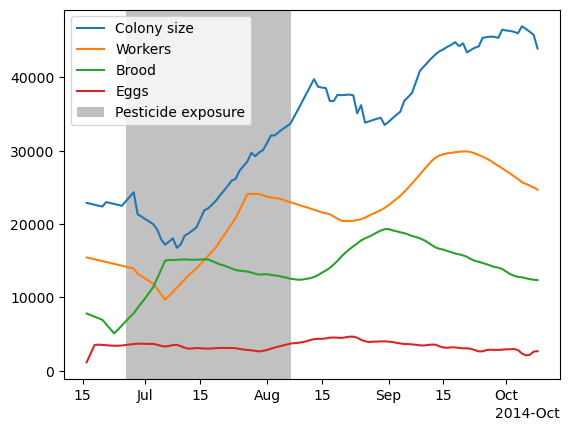

In [6]:
results_trimmed = results.iloc[1:,:].set_index('Date') # drop 'Initial' row
results_trimmed.index= pd.DatetimeIndex(results_trimmed.index) # make a DateTimeIndex
plt.plot(results_trimmed.index, results_trimmed["Colony Size"], label='Colony size')
plt.plot(results_trimmed.index, results_trimmed["Adult Workers"], label='Workers')
plt.plot(results_trimmed.index, results_trimmed["Capped Worker Brood"], label='Brood')
plt.plot(results_trimmed.index, results_trimmed["Worker Eggs"], label='Eggs')
plt.axvspan('2014-06-26', '2014-08-07',facecolor='0.2', alpha=0.3, label = "Pesticide exposure")
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))